In [1]:
from main import Model

In [2]:
import pandas as pd
import numpy as np

def apply_target(data_target):
  return np.where(data_target=='M', -1, 1)

model = Model('./dataset/tp1_ej1_training.csv', (1, 11), (0, 1), apply_target)

S: [10, 9, 1]
Máxima #epocas: 1000
LR: 0.01
B (mini-lotes): 1
epoch: 100; error: 82.40052778196457
epoch: 200; error: 40.48351579199929
epoch: 300; error: 25.73752731977959
epoch: 400; error: 19.055758278811666
epoch: 500; error: 14.244547386671622
epoch: 600; error: 10.86084274080755
epoch: 700; error: 8.415598319800191
epoch: 800; error: 6.966594878857804
epoch: 900; error: 6.1696316041606565


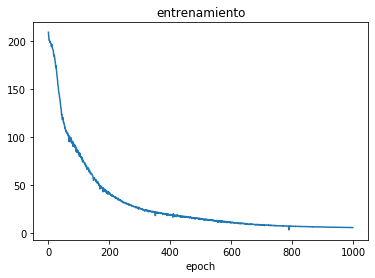

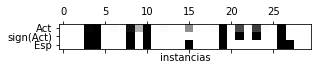

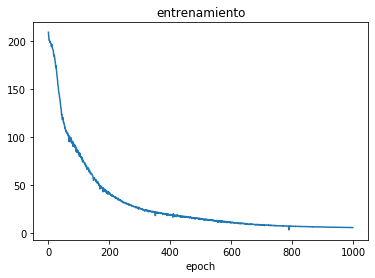

precision: 0.87


In [4]:
errors = model.exp(
    [10, 9, 1],
    1000,
    0.01,
    (0, 200),
    (200, 400),
    1
)

S: [10, 10, 10, 1]
Máxima #epocas: 1000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 19.89808417150228
epoch: 200; error: 6.143710299398791
epoch: 300; error: 3.047271055357947
epoch: 400; error: 1.818979144383205
epoch: 500; error: 1.71072365712868
epoch: 600; error: 1.6706575019582461
epoch: 700; error: 0.9017708348403478
epoch: 800; error: 0.8628178162851319
epoch: 900; error: 0.8455381316368724


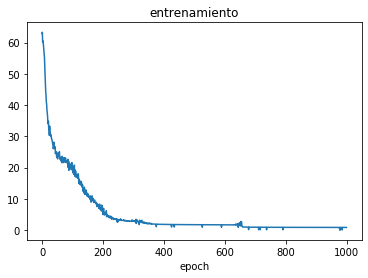

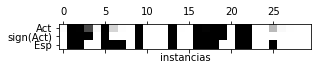

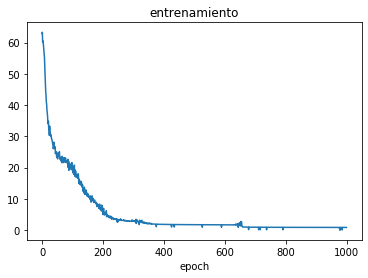

precision: 0.9181818181818182


In [5]:
errors = model.exp(
    [10, 10, 10, 1],
    1000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 5000
LR: 0.02
B (mini-lotes): 5
epoch: 100; error: 17.114675779159896
epoch: 200; error: 4.280238074897554
epoch: 300; error: 2.5049173065904347
epoch: 400; error: 2.4542359168106356
epoch: 500; error: 2.435760465687315
epoch: 600; error: 2.42621792807028
epoch: 700; error: 2.4200655618195466
epoch: 800; error: 2.4168678248669058
epoch: 900; error: 2.4141890382551012
epoch: 1000; error: 2.4121821908024685
epoch: 1100; error: 2.410740590648011
epoch: 1200; error: 2.4091929573027384
epoch: 1300; error: 2.4083170830001737
epoch: 1400; error: 2.407784696359094
epoch: 1500; error: 2.4071222682792492
epoch: 1600; error: 0.8060829409578881
epoch: 1700; error: 2.4060256379224314
epoch: 1800; error: 2.4056352634776608
epoch: 1900; error: 2.4050995180755734
epoch: 2000; error: 2.4048814831385927
epoch: 2100; error: 2.4041430408991515
epoch: 2200; error: 2.4043760277029396
epoch: 2300; error: 2.404142059361992
epoch: 2400; error: 2.40386778485743
epoch: 2500; er

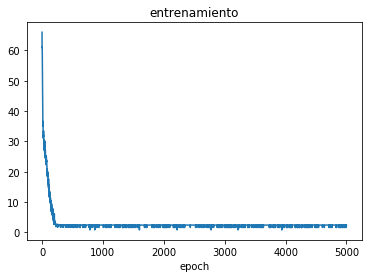

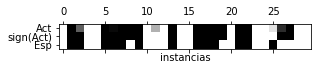

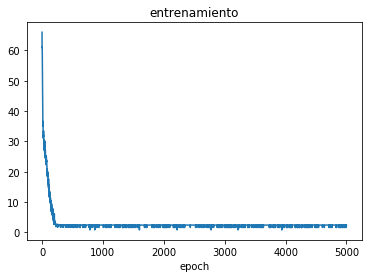

precision: 0.8545454545454545


In [6]:
errors = model.exp(
    [10, 10, 10, 1],
    5000,
    0.02,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 1000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 12.728145374612899
epoch: 200; error: 1.2904033748398391
epoch: 300; error: 0.92866873138923
epoch: 400; error: 0.8698210343836388
epoch: 500; error: 0.8470756697287588
epoch: 600; error: 0.8340563131023259
epoch: 700; error: 0.8262355819083075
epoch: 800; error: 0.022265577826562456
epoch: 900; error: 0.0187505037546278


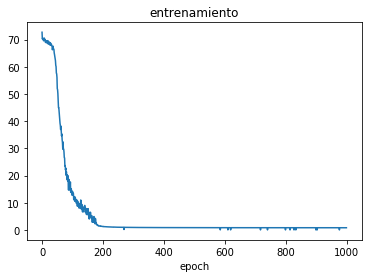

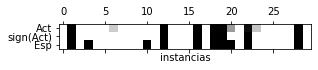

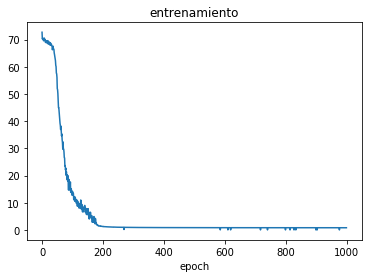

precision: 0.9


In [7]:
errors = model.exp(
    [10, 10, 10, 1],
    1000,
    0.01,
    (0, 350),
    (350, 410),
    5
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.02
B (mini-lotes): 5
epoch: 100; error: 23.180859803366015
epoch: 200; error: 15.665372417078995
epoch: 300; error: 11.75842981149464
epoch: 400; error: 9.177725455075503
epoch: 500; error: 7.7304082477608285
epoch: 600; error: 7.583992880806905
epoch: 700; error: 8.24072046277246
epoch: 800; error: 7.409300303182019
epoch: 900; error: 8.17239258285359
epoch: 1000; error: 7.346324308371912
epoch: 1100; error: 7.325745742136911
epoch: 1200; error: 8.112139747366358
epoch: 1300; error: 8.0997262924248
epoch: 1400; error: 8.087293827519192
epoch: 1500; error: 8.0774514942971
epoch: 1600; error: 8.070408433594473
epoch: 1700; error: 7.264007539525809
epoch: 1800; error: 8.060556966738213
epoch: 1900; error: 8.057324676885635
epoch: 2000; error: 8.053260328415053
epoch: 2100; error: 8.049549425212687
epoch: 2200; error: 7.2456247577286526
epoch: 2300; error: 8.043663406875071
epoch: 2400; error: 8.038988919039596
epoch: 2500; error: 8.03869795101332

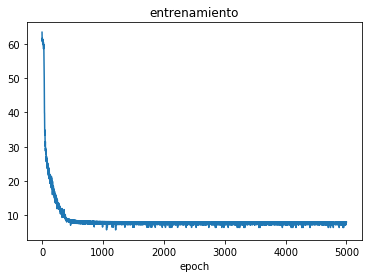

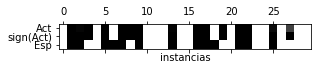

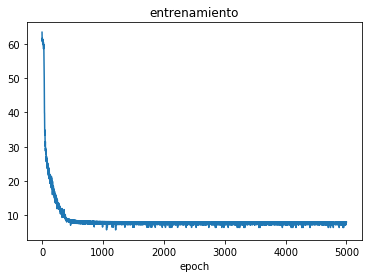

precision: 0.8181818181818182


In [8]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.02,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 24.97859996832336
epoch: 200; error: 16.364181484463977
epoch: 300; error: 12.912809106383648
epoch: 400; error: 11.272148108062648
epoch: 500; error: 9.160155426967133
epoch: 600; error: 9.336774078742291
epoch: 700; error: 8.149452414174146
epoch: 800; error: 7.908986000840541
epoch: 900; error: 7.6984334188545
epoch: 1000; error: 8.38299562037688
epoch: 1100; error: 7.50502130194873
epoch: 1200; error: 8.234327110468804
epoch: 1300; error: 7.393027407342969
epoch: 1400; error: 8.164543109561054
epoch: 1500; error: 7.338424617371886
epoch: 1600; error: 7.3223011635807
epoch: 1700; error: 8.10826714377411
epoch: 1800; error: 8.092686540460656
epoch: 1900; error: 8.083725638074085
epoch: 2000; error: 8.07799633901983
epoch: 2100; error: 8.071423131082641
epoch: 2200; error: 8.06496295184726
epoch: 2300; error: 7.257997856468805
epoch: 2400; error: 8.054979822432669
epoch: 2500; error: 7.252171749954751
ep

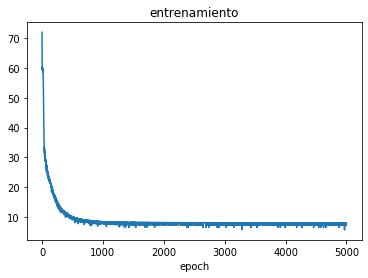

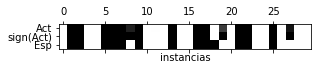

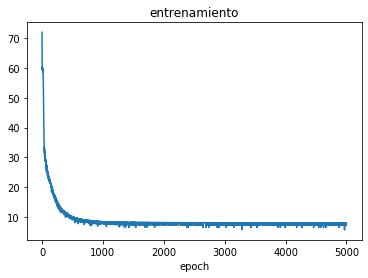

precision: 0.8363636363636363


In [9]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 10
epoch: 100; error: 11.930310962319462
epoch: 200; error: 10.372896545373358
epoch: 300; error: 8.45864503222794
epoch: 400; error: 7.08580698520671
epoch: 500; error: 6.22459310144702
epoch: 600; error: 5.603755004635221
epoch: 700; error: 4.44962453082628
epoch: 800; error: 4.675404281745986
epoch: 900; error: 4.989613081385582
epoch: 1000; error: 4.956039819649249
epoch: 1100; error: 4.497438785740615
epoch: 1200; error: 4.2819529143104145
epoch: 1300; error: 4.177952599081241
epoch: 1400; error: 3.7327878561279615
epoch: 1500; error: 4.100719117549218
epoch: 1600; error: 4.0782004307739514
epoch: 1700; error: 3.6581025045170565
epoch: 1800; error: 3.656813174273325
epoch: 1900; error: 4.047931409472306
epoch: 2000; error: 4.043414362911972
epoch: 2100; error: 4.038529015178256
epoch: 2200; error: 4.0348047716660185
epoch: 2300; error: 4.031391979619902
epoch: 2400; error: 4.029725878117598
epoch: 2500; error: 3.62783566

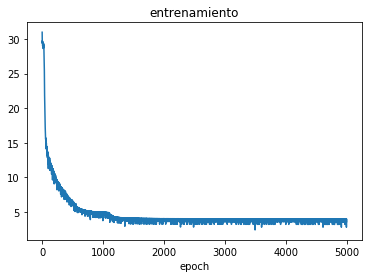

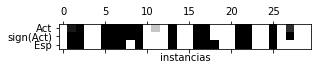

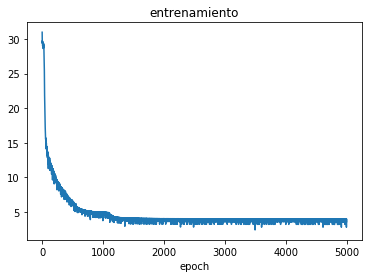

precision: 0.8272727272727273


In [10]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    10
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 3
epoch: 100; error: 43.23445942916522
epoch: 200; error: 33.63870559505426
epoch: 300; error: 27.137674038684853
epoch: 400; error: 22.706760043579212
epoch: 500; error: 19.079692361408547
epoch: 600; error: 16.682159292092976
epoch: 700; error: 15.132329258675718
epoch: 800; error: 13.052047384643448
epoch: 900; error: 14.131726610401792
epoch: 1000; error: 13.985659485022682
epoch: 1100; error: 13.886938329159733
epoch: 1200; error: 12.456448898563103
epoch: 1300; error: 13.732884429279888
epoch: 1400; error: 13.672896106957745
epoch: 1500; error: 12.296290175193889
epoch: 1600; error: 13.59773265247792
epoch: 1700; error: 13.575723757486433
epoch: 1800; error: 13.554935644723205
epoch: 1900; error: 13.539264269163214
epoch: 2000; error: 13.519992677979957
epoch: 2100; error: 13.509733212865937
epoch: 2200; error: 13.496530485152427
epoch: 2300; error: 13.484057498323926
epoch: 2400; error: 13.455418514832505
epoch: 2500; 

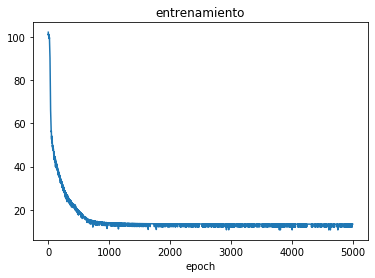

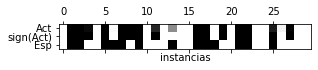

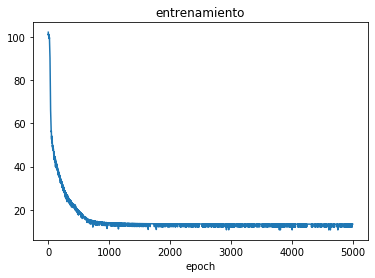

precision: 0.8181818181818182


In [11]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    3
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 1
epoch: 100; error: 133.95086762802578
epoch: 200; error: 43.49630031582544
epoch: 300; error: 24.771673887699713
epoch: 400; error: 16.06973255256183
epoch: 500; error: 11.517221333147361
epoch: 600; error: 8.986008366371951
epoch: 700; error: 7.76602344610243
epoch: 800; error: 6.9092377823629265
epoch: 900; error: 6.328525086138086
epoch: 1000; error: 5.905662563607549
epoch: 1100; error: 5.604355598242358
epoch: 1200; error: 5.383352796876793
epoch: 1300; error: 5.194049940413762
epoch: 1400; error: 5.063610604004407
epoch: 1500; error: 4.949013469220222
epoch: 1600; error: 4.8554173455175675
epoch: 1700; error: 4.769119352180603
epoch: 1800; error: 4.706996556884262
epoch: 1900; error: 4.650259928861547
epoch: 2000; error: 4.5995997450119885
epoch: 2100; error: 4.5575187772733035
epoch: 2200; error: 4.516149150027029
epoch: 2300; error: 4.485150401029793
epoch: 2400; error: 4.455408868295124
epoch: 2500; error: 4.428459

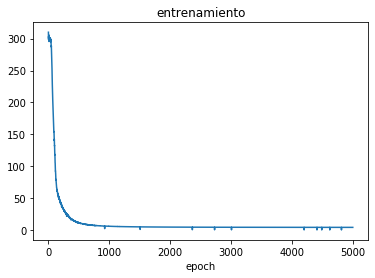

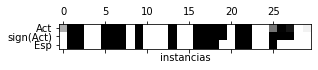

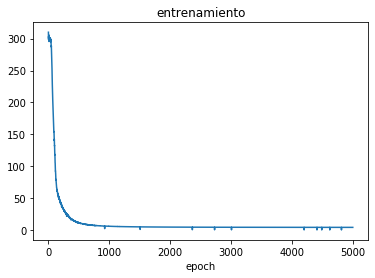

precision: 0.9


In [12]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    1
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 6
epoch: 100; error: 21.116785737286488
epoch: 200; error: 15.316695459688052
epoch: 300; error: 12.636261672162268
epoch: 400; error: 10.286177508833973
epoch: 500; error: 10.140018949020293
epoch: 600; error: 9.537416841264427
epoch: 700; error: 8.486843750659116
epoch: 800; error: 7.918716058435854
epoch: 900; error: 7.265699062670099
epoch: 1000; error: 7.0740466529897885
epoch: 1100; error: 6.280687918223503
epoch: 1200; error: 6.885408025180131
epoch: 1300; error: 6.178380021759326
epoch: 1400; error: 6.815259490780061
epoch: 1500; error: 6.791422264537314
epoch: 1600; error: 6.7809575391474795
epoch: 1700; error: 6.764587734382354
epoch: 1800; error: 6.7590317131715105
epoch: 1900; error: 6.75068673297104
epoch: 2000; error: 6.743887338612884
epoch: 2100; error: 6.731141612483044
epoch: 2200; error: 6.729138637109915
epoch: 2300; error: 6.728169551906431
epoch: 2400; error: 6.723284318735516
epoch: 2500; error: 6.05193

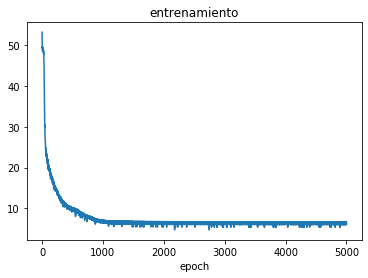

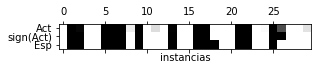

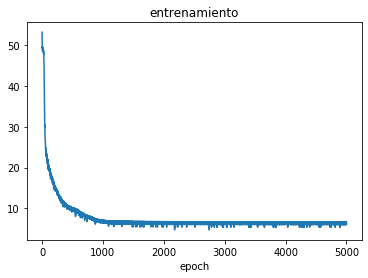

precision: 0.9


In [13]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    6
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 7
epoch: 100; error: 18.00485472173855
epoch: 200; error: 13.630182200652534
epoch: 300; error: 11.346309070021515
epoch: 400; error: 9.282421566568713
epoch: 500; error: 7.434065863289937
epoch: 600; error: 7.511986550072164
epoch: 700; error: 7.280055775235521
epoch: 800; error: 7.136830109834953
epoch: 900; error: 7.069917942684202
epoch: 1000; error: 7.024681912230193
epoch: 1100; error: 6.990928757054958
epoch: 1200; error: 6.398962464466701
epoch: 1300; error: 6.387566079069872
epoch: 1400; error: 5.886466814750369
epoch: 1500; error: 6.401580731022755
epoch: 1600; error: 6.378874025686573
epoch: 1700; error: 5.79669465153523
epoch: 1800; error: 6.356025338190165
epoch: 1900; error: 6.349471930986476
epoch: 2000; error: 6.341957874660317
epoch: 2100; error: 6.337841955929462
epoch: 2200; error: 6.3317709027073645
epoch: 2300; error: 6.329369781462876
epoch: 2400; error: 6.324469368409644
epoch: 2500; error: 6.3231497734

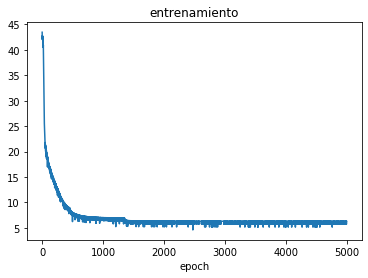

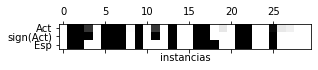

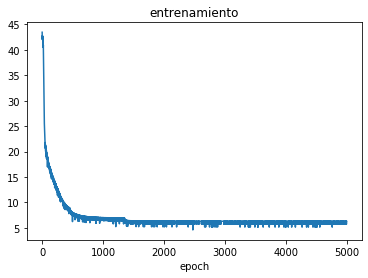

precision: 0.8636363636363636


In [14]:
 errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 26.133880253107456
epoch: 200; error: 4.1524157859213675
epoch: 300; error: 1.942127433510853
epoch: 400; error: 0.9703072354113175
epoch: 500; error: 0.886435489328315
epoch: 600; error: 0.8606523423710581
epoch: 700; error: 0.8421051134989525
epoch: 800; error: 0.8352834990041905
epoch: 900; error: 0.8293593600538682
epoch: 1000; error: 0.8248331856661415
epoch: 1100; error: 0.8215463330889164
epoch: 1200; error: 0.8176923938171242
epoch: 1300; error: 0.8168657542990654
epoch: 1400; error: 0.8149805916136241
epoch: 1500; error: 0.8132457395835379
epoch: 1600; error: 0.8125556341456018
epoch: 1700; error: 0.8115767231843258
epoch: 1800; error: 0.8106965132930923
epoch: 1900; error: 0.8092345582228021
epoch: 2000; error: 0.809302188468405
epoch: 2100; error: 0.8087199813139252
epoch: 2200; error: 0.8075361588385436
epoch: 2300; error: 0.8073441076804542
epoch: 2400; error: 0.807021892247457
epoch: 250

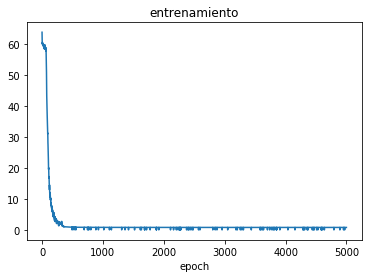

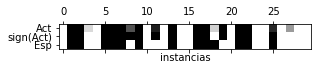

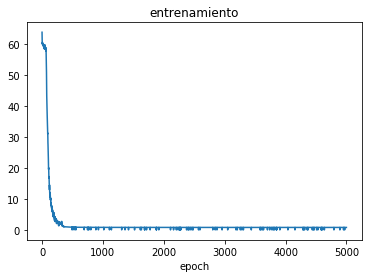

precision: 0.8818181818181818


In [15]:
errors = model.exp(
    [10, 10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 15000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 2.021510284165534
epoch: 200; error: 0.1104799820900835
epoch: 300; error: 0.04665870235922784
epoch: 400; error: 0.027453625966364394
epoch: 500; error: 0.019457721489903167
epoch: 600; error: 0.014537316764335256
epoch: 700; error: 0.011298395456255739
epoch: 800; error: 0.009263459025959462
epoch: 900; error: 0.00830899800021327
epoch: 1000; error: 0.007106868406274783
epoch: 1100; error: 0.005513217129931278
epoch: 1200; error: 0.005558786311622476
epoch: 1300; error: 0.005017046064779083
epoch: 1400; error: 0.004144785334927651
epoch: 1500; error: 0.0040814841487464065
epoch: 1600; error: 0.0037883493768311157
epoch: 1700; error: 0.0034705825235134724
epoch: 1800; error: 0.003233199214599226
epoch: 1900; error: 0.0028631574782203616
epoch: 2000; error: 0.002803996570956594
epoch: 2100; error: 0.0026020255396650583
epoch: 2200; error: 0.0024454500848854394
epoch: 2300; error: 0.002280603622652705

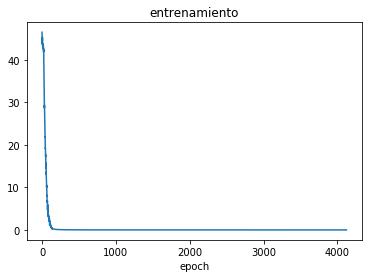

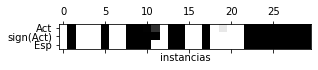

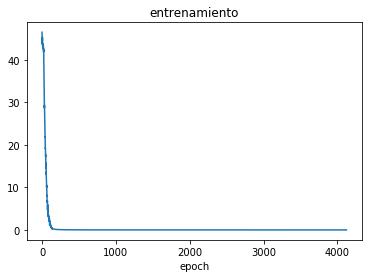

precision: 0.9411764705882353


In [21]:
errors = model.exp(
    [10, 10, 10, 1],
    15000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 10000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 3.8576374823173882
epoch: 200; error: 1.4574162948343532
epoch: 300; error: 1.152136640321457
epoch: 400; error: 1.3518655515945375
epoch: 500; error: 0.6095069299521272
epoch: 600; error: 0.5967659580326476
epoch: 700; error: 0.5893444779810162
epoch: 800; error: 0.5853041573003039
epoch: 900; error: 0.5808081871500342
epoch: 1000; error: 0.5794917913511467
epoch: 1100; error: 0.5746031703482064
epoch: 1200; error: 0.5391951869765501
epoch: 1300; error: 0.4761550796899144
epoch: 1400; error: 0.16695311348617273
epoch: 1500; error: 0.035982335572888116
epoch: 1600; error: 0.022502451909836855
epoch: 1700; error: 0.015200978496828839
epoch: 1800; error: 0.012457982611042277
epoch: 1900; error: 0.00984952713415935
epoch: 2000; error: 0.00856226338975064
epoch: 2100; error: 0.007196312249816175
epoch: 2200; error: 0.006639038131753971
epoch: 2300; error: 0.004775614165387393
epoch: 2400; error: 0.005342

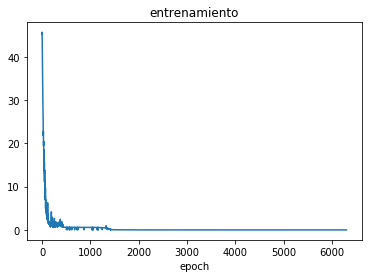

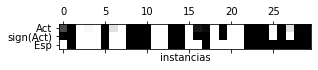

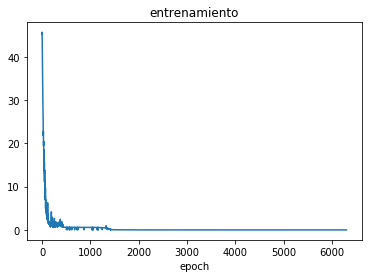

precision: 0.8529411764705882


In [23]:
errors = model.exp(
    [10, 10, 10, 1],
    10000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 10000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 7.068557570273489
epoch: 200; error: 1.8618002567636502
epoch: 300; error: 1.2844689257708128
epoch: 400; error: 1.1910871362851054
epoch: 500; error: 0.7390280664927187
epoch: 600; error: 0.039729171369078366
epoch: 700; error: 0.021067564761680136
epoch: 800; error: 0.01791910090828481
epoch: 900; error: 0.01530092391889989
epoch: 1000; error: 0.012680242538609722
epoch: 1100; error: 0.010906800966133284
epoch: 1200; error: 0.009638305549244252
epoch: 1300; error: 0.008278825548240115
epoch: 1400; error: 0.00751569064312382
epoch: 1500; error: 0.007155504551072678
epoch: 1600; error: 0.006280893832806495
epoch: 1700; error: 0.005891713752330004
epoch: 1800; error: 0.0054950164429013034
epoch: 1900; error: 0.004548424367449322
epoch: 2000; error: 0.00462138994849765
epoch: 2100; error: 0.004576697592485147
epoch: 2200; error: 0.004307468984693663
epoch: 2300; error: 0.0038347395268929917
epoch: 2400

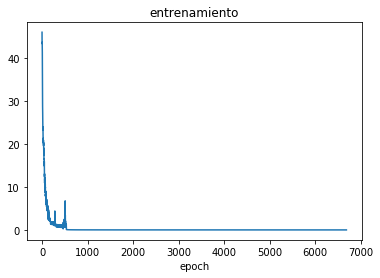

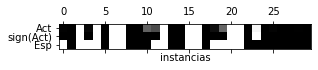

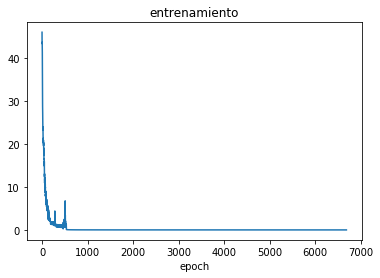

precision: 0.8431372549019608


In [24]:
errors = model.exp(
    [10, 10, 10, 1],
    10000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 5000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 5.589459846758078
epoch: 200; error: 0.1486787264593842
epoch: 300; error: 0.06097761842691602
epoch: 400; error: 0.03527617802453712
epoch: 500; error: 0.026635043153271115
epoch: 600; error: 0.020517046739997765
epoch: 700; error: 0.016379943934359886
epoch: 800; error: 0.013767759007609388
epoch: 900; error: 0.011655014489570636
epoch: 1000; error: 0.010189884277843167
epoch: 1100; error: 0.008868115639425477
epoch: 1200; error: 0.00805190966304298
epoch: 1300; error: 0.007281428378269152
epoch: 1400; error: 0.006606153817868212
epoch: 1500; error: 0.00604311906391737
epoch: 1600; error: 0.005217976348870575
epoch: 1700; error: 0.005179753981009306
epoch: 1800; error: 0.004311277808807886
epoch: 1900; error: 0.004285298684594301
epoch: 2000; error: 0.004142547766510888
epoch: 2100; error: 0.003950727445485011
epoch: 2200; error: 0.003736230810446242
epoch: 2300; error: 0.003559859356161083
epoch: 2

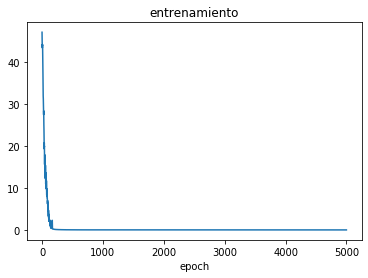

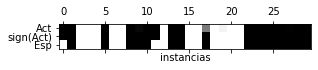

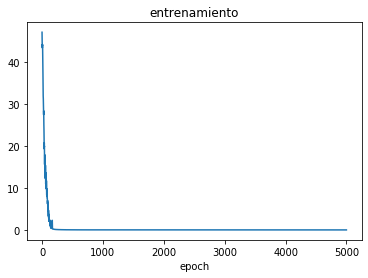

precision: 0.9313725490196079


In [25]:
errors = model.exp(
    [10, 10, 10, 1],
    5000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 19.424793829891197
epoch: 200; error: 1.5119752537398807
epoch: 300; error: 0.6325884599082207
epoch: 400; error: 0.6015245222157752
epoch: 500; error: 0.8444806336397229
epoch: 600; error: 0.02122812396884771
epoch: 700; error: 0.014989048663699628
epoch: 800; error: 0.011811031395491818
epoch: 900; error: 0.008989736521651822
epoch: 1000; error: 0.007884643970870348
epoch: 1100; error: 0.006562869730811404
epoch: 1200; error: 0.005864697315620769
epoch: 1300; error: 0.005083447964846796
epoch: 1400; error: 0.004603557738670332
epoch: 1500; error: 0.004183985461223245
epoch: 1600; error: 0.003704813267795765
epoch: 1700; error: 0.003423253697823777
epoch: 1800; error: 0.0033696883702882684
epoch: 1900; error: 0.0031397877563354173


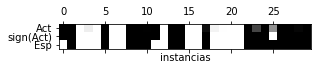

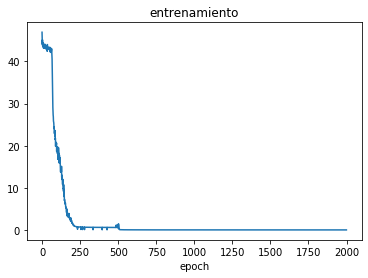

precision: 0.9313725490196079


In [9]:
errors = model.exp(
    [10, 10, 10, 1],
    2000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 6.491656814660248
epoch: 200; error: 1.810675436468702
epoch: 300; error: 1.4828876842509997
epoch: 400; error: 0.6266352706740398
epoch: 500; error: 0.6045427584548377
epoch: 600; error: 0.5946320129571566
epoch: 700; error: 0.58899692086354
epoch: 800; error: 0.5841324237015123
epoch: 900; error: 0.5829779550815186
epoch: 1000; error: 0.5815221679959517
epoch: 1100; error: 0.5800768853201184
epoch: 1200; error: 0.5792708778566369
epoch: 1300; error: 0.5783795654970887
epoch: 1400; error: 0.5773863593625477
epoch: 1500; error: 0.5772661223003153
epoch: 1600; error: 0.5767956304282438
epoch: 1700; error: 0.5763884417040278
epoch: 1800; error: 0.576017232058474
epoch: 1900; error: 0.5756432872794911


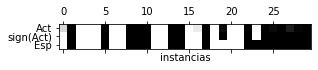

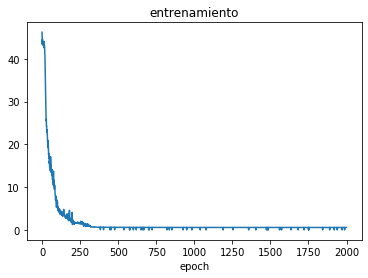

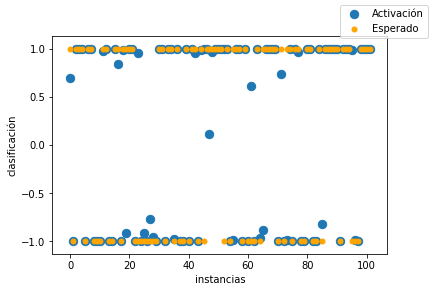

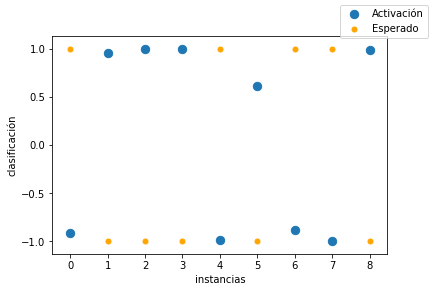

precision: 0.9117647058823529


In [3]:
errors = model.exp(
    [10, 10, 10, 1],
    2000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 4.193835790330998
epoch: 200; error: 0.0912025020972341
epoch: 300; error: 0.03880608060558325
epoch: 400; error: 0.023486012525599165
epoch: 500; error: 0.017378532703575443
epoch: 600; error: 0.013336160563005696
epoch: 700; error: 0.010264894230071927
epoch: 800; error: 0.008674879395402506
epoch: 900; error: 0.007361391396783542
epoch: 1000; error: 0.006523571281223734
epoch: 1100; error: 0.0059672199735805705
epoch: 1200; error: 0.005353711119052626
epoch: 1300; error: 0.004651786275556075
epoch: 1400; error: 0.004403252283527378
epoch: 1500; error: 0.004056515461743979
epoch: 1600; error: 0.0037371140510489387
epoch: 1700; error: 0.003471698718393609
epoch: 1800; error: 0.003166047957658012
epoch: 1900; error: 0.002961022623752323


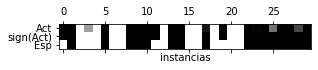

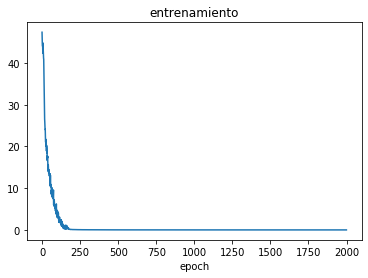

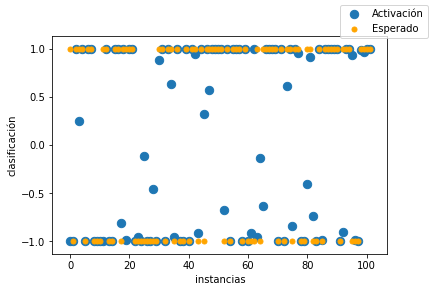

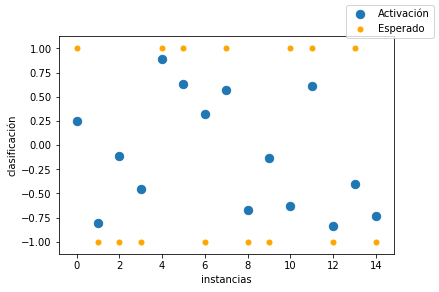

precision: 0.9019607843137255


In [4]:
errors = model.exp(
    [10, 10, 10, 1],
    2000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 4.845679527272157
epoch: 200; error: 1.2256704511432017
epoch: 300; error: 1.1780794824951213
epoch: 400; error: 1.1650856022148826
epoch: 500; error: 1.1581871415516813
epoch: 600; error: 1.154836695347739
epoch: 700; error: 1.152604302078382
epoch: 800; error: 1.1506923390686705
epoch: 900; error: 1.1494365262800046
epoch: 1000; error: 1.1483009059090121
epoch: 1100; error: 1.1463216635767797
epoch: 1200; error: 1.112528507676081
epoch: 1300; error: 0.5970724229534605
epoch: 1400; error: 0.5845548613659901
epoch: 1500; error: 0.5802062056708442
epoch: 1600; error: 0.5781438190921011
epoch: 1700; error: 0.5776761773651949
epoch: 1800; error: 0.5766690363457024
epoch: 1900; error: 0.5760984496780766


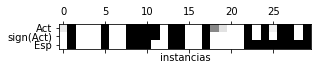

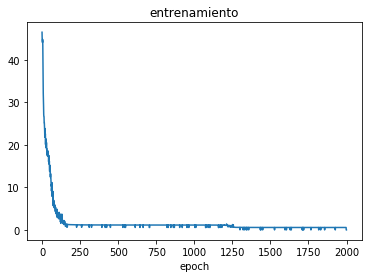

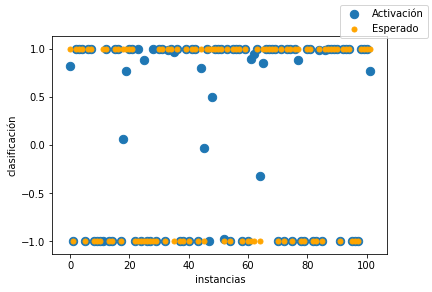

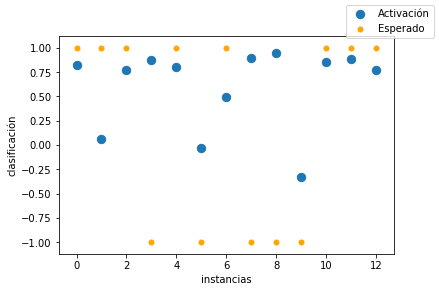

precision: 0.9215686274509803


In [3]:
errors = model.exp(
    [10, 10, 10, 1],
    2000,
    0.02,
    (0, 308),
    (308, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 7
epoch: 100; error: 7.767272258905404
epoch: 200; error: 0.7078952067873987
epoch: 300; error: 0.6138059771397593
epoch: 400; error: 0.594602994484976
epoch: 500; error: 0.025183733708878202
epoch: 600; error: 0.014480483179788234
epoch: 700; error: 0.01063041367814999
epoch: 800; error: 0.008300291649385052
epoch: 900; error: 0.007114762531794177
epoch: 1000; error: 0.00613482647586423
epoch: 1100; error: 0.005397215580640387
epoch: 1200; error: 0.0046749087852999555
epoch: 1300; error: 0.004320136142787856
epoch: 1400; error: 0.003957607322334446
epoch: 1500; error: 0.003609624841910255
epoch: 1600; error: 0.0031111762233589487
epoch: 1700; error: 0.002760635137705946
epoch: 1800; error: 0.0028120789347637946
epoch: 1900; error: 0.0026217542952609936


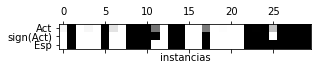

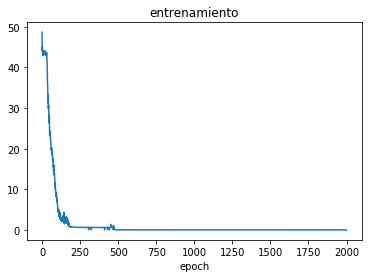

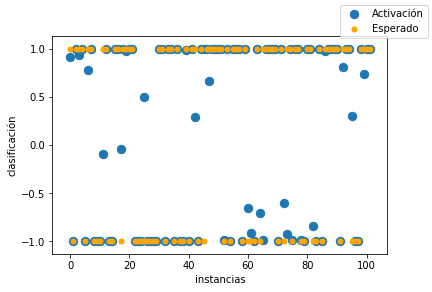

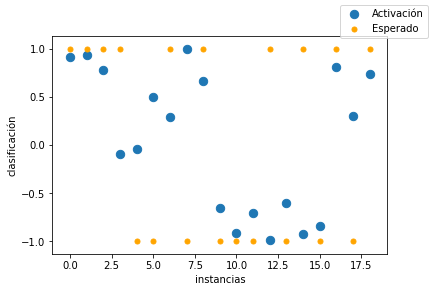

precision: 0.9411764705882353


In [3]:
errors = model.exp(
    [10, 10, 10, 1],
    2000,
    0.02,
    (0, 308),
    (308, 410),
    7
)